# Traitement de l'image : Filtrage I

# Introduction

Le principal objectif du filtrage est de pré-traiter une image afin que l’image filtrée soit plus adaptée que
l’image originale pour une application spécifique.
Nous allons étudier dans ce cadre les méthodes s’appliquant dans le domaine spatial (tout en illustrant, lorsque c’est possible, le lien avec le domaine fréquentiel).
Les méthodes spatiales sont des procédures qui opèrent directement sur les pixels de l’image.
D’une manière générale, ces techniques mettent en œuvre une convolution discrète 2D par un masque h de l’image de départ I, comme indiqué sur la figure ci-dessous.

L’operation qui, dans le domaine temporel, se traduit par un produit de convolution, s’exprime aussi par un
simple produit entre le gain frequentiel du filtre h et la transformee de Fourier de l’image e :

C’est pourquoi l’etude du gain frequentiel du masque utilisé (correspondant à la transformee de Fourier de h) permet souvent de caractériser la nature du filtre (filtre passe-bas, filtre passe-haut). Nous allons maintenant étudier differents filtres.

## 1. Transformée de Fourier

### 1.1 Rappel

L’image ayant un nombre fini de pixels (c’est un signal à support borné), on utilise la transformee de
Fourier discrète (TFD) definie par

où
- F(u,v) est la transformée de Fourier de l'image f(m,n);
- M et N sont les dimensions de l'image;
- les deux variables u et v représentent les fréquences spatiales de l'image selon les directions x et y respectivement.

La fonction F(u,v) est en général un nombre complexe, même si f(m,n) est un nombre réel : elle possède donc au module et une phase et on peut choisir de représenter l'un ou l'autre. Nous ne nous intéresserons ici qu'au module.

### 1.2 Implémentation

Dans cette section, on applique la TF et on l’affiche.
Ce dernier point demande quelques manipulations pour que le rendu visuel soit bon.
Vous aller avoir besoin de l’import suivant :

In [4]:
# Visionneuse externe interactive
%matplotlib
#imports
import numpy as np # Tableaux
import scipy.ndimage as scp # Correlation et convolution
import matplotlib.pyplot as plt # Visionneur et trac ́es
from matplotlib.colors import LogNorm # echelle logarithmique
import skimage
from scipy import fftpack # Fourier 2D
from scipy import signal

Using matplotlib backend: module://ipympl.backend_nbagg


Deux commandes qui peuvent être utiles :
- Pour importer en niveaux de gris, option as_gray
- pour choisir l’ ́echelle logarithmique lors de l’affichage, option norm=LogNorm(vmin=5)

#### 1.2.1 Importer vos images

In [5]:
# chemin d'accès à mes images 
my_path = "Images/"

image1 = skimage.io.imread(my_path + "cat.png")
image2 = skimage.io.imread(my_path + "blob.png")
image3 = skimage.io.imread(my_path + "blob2.png")
image4 = skimage.io.imread(my_path + "cheval.png")
image5 = skimage.io.imread(my_path + "Mars.jpg")
crepis = skimage.io.imread(my_path + "crepis-chaux.jpg")
laine = skimage.io.imread(my_path + "laine.jpg")
cryoem = skimage.io.imread(my_path + "cryoEM.png")

##### 1.2.2 Peut-on appliquer la TF à une image couleur ? Appliquer la TF avec fftpack.fft2. Quel est le type du résultat ?

In [6]:
TF = fftpack.fft2(image4)
print(type(TF[0][0]))

<class 'numpy.complex128'>


##### 1.2.3 Afficher bêtement le module et l'échelle des couleurs.

min = 30.137436458623345
max = 67327395.0


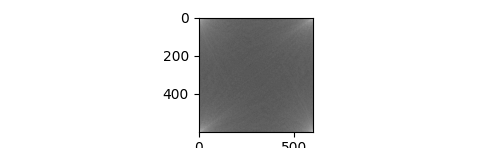

In [10]:
module = abs(TF)
min = np.min(module)
max = np.max(module)
print("min = "+str(min))
print("max = "+str(max))
plt.imshow(module, cmap='gray',norm=LogNorm(vmin=min, vmax=max))
plt.show()

**Que déduire de l'échelle des couleurs ?**

#### 1.2.4 Afficher dans la bonne échelle.

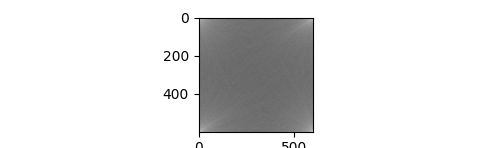

In [11]:
plt.imshow(module,cmap='gray',norm=LogNorm(vmin=5))
plt.show()

**D'après les valeurs, où sont les basses fréquences ?**



#### 1.2.5 Utiliser fftshift sur la transformée de Fourier et afficher.

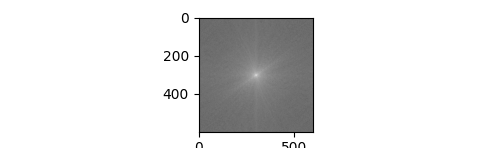

In [13]:
shift = fftpack.fftshift(module)
plt.imshow(shift,cmap='gray',norm=LogNorm(vmin=5))
plt.show()

#### 1.2.6 Pour chacune des images réelles crepis, laine, CryoEM, afficher leur TFD et interpréter.

In [95]:
def afficherTFD(image):
    image_gray = skimage.color.rgb2gray(image)
    TF = fftpack.fft2(image_gray)
    module = abs(TF)
    shift = fftpack.fftshift(module)
    f, axarr = plt.subplots(1,3)
    axarr[0].imshow(image)
    axarr[1].imshow(image_gray,cmap='gray')
    axarr[2].imshow(shift,norm=LogNorm(vmin=5),cmap='gray')

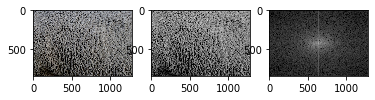

In [96]:
afficherTFD(laine)

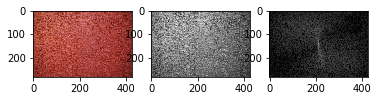

In [97]:
afficherTFD(crepis)

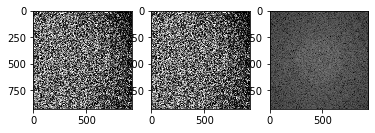

In [98]:
afficherTFD(cryoem)

## 2. Filtre "lisseur"

#### 2.1 Charger l'image bois.jpg. Visualiser son spectre.

In [2]:
bois = skimage.io.imread(my_path + "bois.jpeg")
bois_gray = skimage.color.rgb2gray(bois)
spectrebois = 
f, ax = plt.subplots(1,2)
ax[0].imshow(bois)
ax[1].imshow(spectrebois)

#### 2.2 Créer deux masques h1 et h2 effectuant une moyenne locale sur un voisinage 3x3 et 9x9 (utiliser la commande numpy.ones).

In [108]:
h1 = 1/3*np.ones((3,3))
h2 = 1/9*np.ones((9,9))

#### 2.3 Appliquer ces filtres sur l’image bois en utilisant scipy.signal.convolve2d.

In [117]:
filtre1 = signal.convolve2d(bois_gray,h1)
filtre2 = signal.convolve2d(bois_gray,h2,boundary='wrap')

#### 2.4 Visualiser les resultats et comparer à l’image originale (vous pourrez pour cela afficher une "vue en coupe" de l'image).

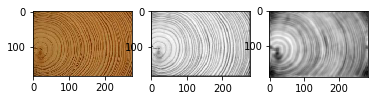

In [120]:
f, ax = plt.subplots(1,3)
ax[0].imshow(bois)
ax[1].imshow(filtre1,cmap='gray')
ax[2].imshow(filtre2,cmap='gray')

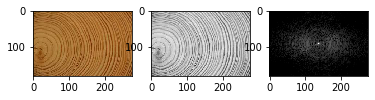

In [122]:
afficherTFD(bois)

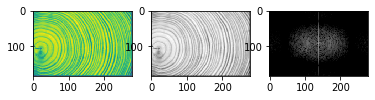

In [123]:
afficherTFD(filtre1)

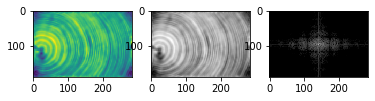

In [124]:
afficherTFD(filtre2)

#### 2.5 Créer l’image boisbruit avec la commande skimage.util.random_noise, paramètres : moyenne nulle et variance à 0,01. Visualiser l'image et son spectre.

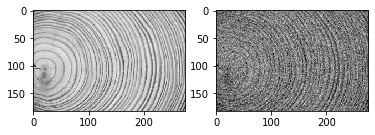

In [138]:
boisbruit = skimage.util.random_noise(bois_gray)
#spectreboisbruit = 
f, ax = plt.subplots(1,2)
ax[0].imshow(bois_gray,cmap='gray')
ax[1].imshow(boisbruit,cmap='gray')
#ax[2].imshow(spectreboisbruit)

#### 2.6 Appliquer les 2 filtres sur l’image boisbruit.

In [136]:
filtre3 = signal.convolve2d(boisbruit,h1)
filtre4 = signal.convolve2d(boisbruit,h2,boundary='symm')

#### 2.7 Visualiser les résultats.

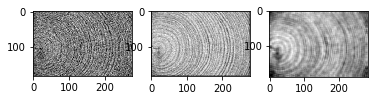

In [139]:
f, ax = plt.subplots(1,3)
ax[0].imshow(boisbruit,cmap='gray')
ax[1].imshow(filtre3,cmap='gray')
ax[2].imshow(filtre4,cmap='gray')

## 3. Filtre non linéaire

Le principal inconvénient des filtres linéaires (basés sur le produit de convolution) est que la réduction
de bruit s’accompagne d’un étalement des transitions entre régions. Cette difficulté peut être surmontée par
l’utilisation des filtres non linéaires, comme par exemple le filtre médian. Comme son nom l’indique, le filtre
médian sélectionne le pixel de la fenêtre d’analyse ayant la valeur médiane. Ce filtre va être insensible à la
présence de valeurs aberrantes si elles sont en nombre raisonnable, ce qui est le cas d’un bruit impulsionnel
(de densité de probabilité f(a) = Ce^(−α|a|) avec α petit).

#### 3.1 Créer l’image boisbruit2. Cette image correspond à l’image bois corrompue par un bruit impulsionnel (poivre et sel) avec α = 0.001

#### 3.2 Visualiser l'image.

#### 3.3 Programmer le filtre médian dans un fonction avec comme paramètres l’image et la taille de la fenêtre (attention à la gestion du bord).

#### 3.4 Appliquer le filtre h = 1/9 ((1 1 1) (1 1 1) (1 1 1))  sur l'image boisbruit2.

#### 3.5 Visualiser et comparer les 2 résultats.

#### 3.6 Commenter les principales différences de ces filtres face au bruit impulsionnel.

#### 3.7 Modifier le filtre médian pour que le pixel ne soit modifié que quand sa valeur est aberrante.

Notons que pour des bruits à distributions assez concentrées (Gaussien), les perforfmances du filtre médian sont assez faibles.

#### 3.8 Recharger l’image boisbruit (bruit gaussien). Appliquer le filtre médian.

#### 3.9 Commenter le résultat.

## 4. Microscopie électronique
Le principe du microscope électronique est de faire passer un flux d’électrons au travers de lentilles
magnetiques puis d’une fine tranche de l’échantillon à observer. On obtient alors une image I grossie de
l’echantillon (image cryoEM).
Cependant les lentilles magnétiques ne sont pas parfaites et elles produisent des aberrations qui doivent
être corrigees (en plus du bruit inhérent au flux életronique). La transformee de Fourier J de l’image I permet de visualiser les aberrations.
#### 4.1 Afficher la TdF de l'image cryoEM.

**Quels sont les éléments notables de l'image ? Est-ce attendu ?**

On modélise les aberrations comme un filtre linéaire F.
#### 4.2 Afficher la colonne centrale de la TDF

**Peut-on récupérer le profil de filtre des aberrations magnétiques à partir de cette ligne ?**
#### 4.3 Appliquer une moyenne sur la TdF, puis réafficher la colonne.

#### 4.4 Calculer et appliquer le filtre correspondant.

#### 4.5 Calculer une moyenne (par cercle) pour le profil.

#### 4.6 Calculer un filtre correctif (attention aux valeurs nulles, filtre à appliquer à la TdF complexe, pas seulement à son module).